Forme y : [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


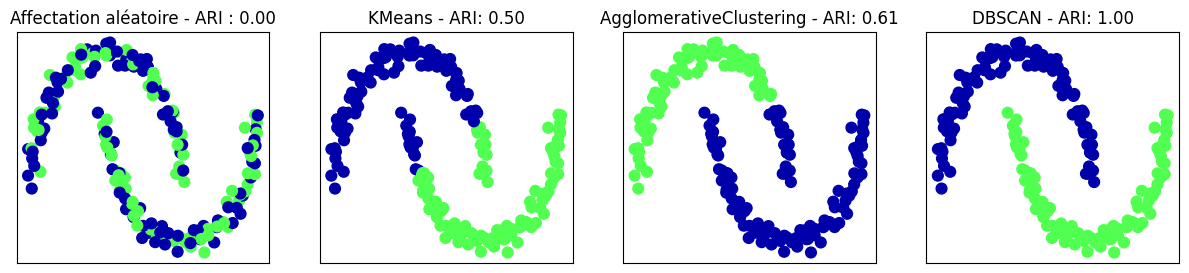

In [12]:
%matplotlib inline
# On utilise les deux métriques : 
# - ARI : adjusted rand index [ indice aléatoire ajusté ]
# - NMI : normalized mutual information [ information mutuelle normalisée ]
# pour mesurer le degré de correspondance entre la sortie produite par un algo de clustering et une partition
# de données.

import matplotlib.pyplot as plt
import numpy as np
import mglearn

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.metrics.cluster import adjusted_rand_score


X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})
algorithmes = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

print("Forme y : {}".format(y))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Affectation aléatoire - ARI : {:.2f}".format(adjusted_rand_score(y,random_clusters)))

for ax, algorithmes in zip(axes[1:], algorithmes):
    clusters = algorithmes.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithmes.__class__.__name__, adjusted_rand_score(y,clusters)))

# Pour chaque point d'un cluster, on évalue sa correspondance avec sa destination
# Les points du cluster généré aléatoirement appartiennent indifféremment à l'une ou l'autre classe 0 ou 1
# La distribution des points dans les clusters trouvés algorithmiquement est de la gauche vers la droite, de plus
# en plus conforme à la réalité (y)